In [20]:
import math
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import sys
import seaborn as sns

from PIL import Image

In [45]:
import requests
import json

url = "https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview"

payload = json.dumps({
  'url': 'https://github.com/retkowsky/images/blob/master/i4.jpg?raw=true'
})
headers = {
  'Ocp-Apim-Subscription-Key': 'd395f4b6ace44e64873f522b4c507630',
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)

print(response.text)


{"vector":[1.4160156,0.8828125,0.3701172,-0.66259766,0.088134766,-0.79296875,-2.3398438,-0.37963867,-3.5820312,-0.734375,1.8710938,-0.6308594,-1.3232422,0.7631836,4.2773438,-2.5351562,0.15405273,-3.4179688,-0.74365234,1.0068359,-3.4941406,1.4179688,0.67333984,-2.9921875,-3.4121094,-1.3642578,0.5942383,-1.2939453,-4.4570312,0.82714844,0.39404297,-1.0917969,-0.6142578,-0.69091797,1.6669922,0.69921875,-0.5991211,-0.5908203,-2.2910156,-4.3007812,2.1835938,-1.3232422,0.06188965,-1.2685547,-1.0947266,-1.2226562,1.6035156,-0.5048828,-1.5136719,-0.066345215,-0.2541504,0.28442383,-2.2050781,-1.625,1.5869141,-2.890625,-2.3203125,4.1289062,0.79052734,2.6113281,0.8876953,-1.9609375,-2.3496094,2.0136719,0.18469238,0.7998047,-2.7050781,0.4423828,0.36889648,1.2773438,0.64990234,-0.75927734,-1.46875,1.9511719,2.0566406,-0.77685547,-2.9960938,-2.6035156,0.86083984,-1.0273438,-2.234375,0.94189453,-6.1289062,-1.2382812,2.4140625,1.4355469,1.5283203,-1.1337891,-2.1777344,-1.1757812,2.8203125,-1.0947266,-2

In [21]:
sys.version

'3.12.2 (tags/v3.12.2:6abddd9, Feb  6 2024, 21:26:36) [MSC v.1937 64 bit (AMD64)]'

In [22]:
import datetime

print("Today is", datetime.datetime.today())

Today is 2024-02-26 14:17:32.466920


In [46]:
endpoint = "https://computer-vision-msft.cognitiveservices.azure.com"
version = "?api-version=2023-02-01-preview"

vec_img_url = endpoint + "/computervision/retrieval:vectorizeImage" + version  # For doing the image vectorization
vec_txt_url = endpoint + "/computervision/retrieval:vectorizeText" + version  # For the prompt vectorization

headers = {
    'Content-type': 'application/json',
    'Ocp-Apim-Subscription-Key': 'd395f4b6ace44e64873f522b4c507630'
}

In [47]:
def image_embedding(imageurl):
    """
    Embedding image using Azure CV 4.0
    """
    image = {"url": imageurl}
    print(f'image : {image}')
    print(f'vec_img_url : {vec_img_url} ')
    r = requests.post(vec_img_url, data=json.dumps(image), headers=headers)
    print(r)
    image_emb = r.json()['vector']

    return image_emb

In [25]:
def text_embedding(promptxt):
    """
    Embedding text using Azure CV 4.0
    """
    prompt = {'text': promptxt}
    r = requests.post(vec_txt_url, data=json.dumps(prompt), headers=headers)
    text_emb = r.json()['vector']

    return text_emb

In [26]:
def get_cosine_similarity(vector1, vector2):
    """
    Get cosine similarity value
    """
    dot_product = 0
    length = min(len(vector1), len(vector2))

    for i in range(length):
        dot_product += vector1[i] * vector2[i]

    magnitude1 = math.sqrt(sum(x * x for x in vector1))
    magnitude2 = math.sqrt(sum(x * x for x in vector2))
    similarity = dot_product / (magnitude1 * magnitude2)

    return similarity

In [27]:
def similarity_results(image_emb, prompts):
    """"
    Get similarity results
    """
    simil_values_list = [
        get_cosine_similarity(image_emb, text_embedding(prompt))
        for prompt in prompts
    ]
    sorted_results = sorted(zip(prompts, simil_values_list),
                            key=lambda x: x[1],
                            reverse=True)

    df = pd.DataFrame(columns=['prompt', 'similarity'])
    for idx, (prompt, simil_val) in enumerate(sorted_results):
        df.loc[idx, 'prompt'] = prompt
        df.loc[idx, 'similarity'] = simil_val

    df["similarity"] = df.similarity.astype(float)

    return df

image : {'url': 'https://github.com/retkowsky/images/blob/master/i4.jpg?raw=true'}
vec_img_url : https://computer-vision-msft.cognitiveservices.azure.com/computervision/retrieval:vectorizeImage?api-version=2023-02-01-preview 
<Response [200]>


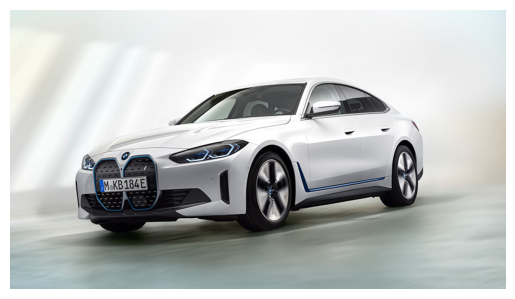

In [48]:
imageurl1 = "https://github.com/retkowsky/images/blob/master/i4.jpg?raw=true"
image_emb1 = image_embedding(imageurl1)

plt.imshow(Image.open(requests.get(imageurl1, stream=True).raw))
plt.axis('off')
plt.show()

In [ ]:

text1 = text_embedding("a dog")

In [ ]:
get_cosine_similarity(image_emb1, text1)

In [ ]:
text2 = text_embedding("a car")

In [ ]:
get_cosine_similarity(image_emb1, text2)

In [ ]:
plt.imshow(Image.open(requests.get(imageurl1, stream=True).raw))
plt.axis('off')
plt.show()

In [ ]:
prompts = [
    'bird', 'a truck', 'a car', 'a blue car', 'a white car', 'a BMW white car',
    'a tesla car', 'a mercedes car', 'a man', 'a ford car'
]

In [ ]:

df = similarity_results(image_emb1, prompts)

cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

In [ ]:
imageurl2 = "https://github.com/retkowsky/images/blob/master/xboxps5.jpg?raw=true"
image_emb2 = image_embedding(imageurl2)

plt.imshow(Image.open(requests.get(imageurl2, stream=True).raw))
plt.axis('off')
plt.show()

In [ ]:
prompts = [
    'PS5', 'Xbox', 'play station', 'Sony', 'controller', 'Microsoft',
    'games console', 'guitar', 'fish', 'apple', 'car', 'street', 'truck',
    'Miami', 'black controller', 'white controller'
]

In [ ]:
df = similarity_results(image_emb2, prompts)

cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

In [ ]:
imageurl3 = "https://github.com/retkowsky/images/blob/master/sodas.jpg?raw=true"
image_emb3 = image_embedding(imageurl3)

plt.imshow(Image.open(requests.get(imageurl3, stream=True).raw))
plt.axis('off')
plt.show()

In [ ]:
prompts = [
    'a can', 'coca cola', 'pepsi', '7 up', 'water', 'wine', 'beer', 'gin',
    'alcohol', 'lemon', 'drink', 'I do not know', 'food', 'soda bottles', 'coke bottle'
]

In [ ]:
df = similarity_results(image_emb3, prompts)

cm = sns.light_palette("green", as_cmap=True)
df.style.background_gradient(cmap=cm)

In [ ]:
imageurl4 = "https://github.com/retkowsky/images/blob/master/i4.jpg?raw=true"
image_emb4 = image_embedding(imageurl4)

plt.imshow(Image.open(requests.get(imageurl4, stream=True).raw))
plt.axis('off')
plt.show()

In [ ]:
imageurl5 = "https://github.com/retkowsky/images/blob/master/i4_2.jpg?raw=true"
whitebmw = image_embedding(imageurl5)

plt.imshow(Image.open(requests.get(imageurl5, stream=True).raw))
plt.axis('off')
plt.show()

In [ ]:
imageurl6 = "https://github.com/retkowsky/images/blob/master/cat.jpg?raw=true"
cat = image_embedding(imageurl6)

plt.imshow(Image.open(requests.get(imageurl6, stream=True).raw))
plt.axis('off')
plt.show()

In [ ]:

get_cosine_similarity(image_emb4, whitebmw)

In [ ]:
get_cosine_similarity(image_emb4, cat)